In [1]:
from __future__ import print_function, division
#virtualenv -p python3 venv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [3]:
import os
import sys
base_module_path = os.path.abspath(os.path.join('..'))
if base_module_path not in sys.path:
    sys.path.append(base_module_path)
import cervix as c

In [4]:
ls ../data/train/

Type_1/ Type_2/ Type_3/


In [5]:
df = c.data.make_base_df()
df = c.processing.transform_save_imgs(df, c.processing.grayscale_resize);
df = c.processing.random_forest_transform(df, 'grayscale_resize_path', grayscale=True)

In [6]:
train, validate, test = c.data.split_df(df); 

In [7]:
print(train.shape)
train.head()

(888, 6)


,path,Type,filetype,num_id,grayscale_resize_path,vec
137,../data/train/Type_1/441.jpg,1,jpg,441,../data/processed/grayscale_resize/train/441.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
130,../data/train/Type_1/396.jpg,1,jpg,396,../data/processed/grayscale_resize/train/396.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1032,../data/train/Type_3/1003.jpg,3,jpg,1003,../data/processed/grayscale_resize/train/1003.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
177,../data/train/Type_1/623.jpg,1,jpg,623,../data/processed/grayscale_resize/train/623.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1303,../data/train/Type_3/480.jpg,3,jpg,480,../data/processed/grayscale_resize/train/480.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [8]:
print(validate.shape)
validate.head()

(296, 6)


,path,Type,filetype,num_id,grayscale_resize_path,vec
1126,../data/train/Type_3/1300.jpg,3,jpg,1300,../data/processed/grayscale_resize/train/1300.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1446,../data/train/Type_3/897.jpg,3,jpg,897,../data/processed/grayscale_resize/train/897.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
588,../data/train/Type_2/225.jpg,2,jpg,225,../data/processed/grayscale_resize/train/225.jpg,"[[0.0, 0.0, 0.0151099471304, 0.0151099471304, ..."
907,../data/train/Type_2/785.jpg,2,jpg,785,../data/processed/grayscale_resize/train/785.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
674,../data/train/Type_2/381.jpg,2,jpg,381,../data/processed/grayscale_resize/train/381.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [9]:
print(test.shape)
test.head()

(297, 6)


,path,Type,filetype,num_id,grayscale_resize_path,vec
1067,../data/train/Type_3/1107.jpg,3,jpg,1107,../data/processed/grayscale_resize/train/1107.jpg,"[[0.0158690181357, 0.0158690181357, 0.01586901..."
1305,../data/train/Type_3/49.jpg,3,jpg,49,../data/processed/grayscale_resize/train/49.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
328,../data/train/Type_2/1138.jpg,2,jpg,1138,../data/processed/grayscale_resize/train/1138.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0131317753844, 0.01313..."
704,../data/train/Type_2/428.jpg,2,jpg,428,../data/processed/grayscale_resize/train/428.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
191,../data/train/Type_1/7.jpg,1,jpg,7,../data/processed/grayscale_resize/train/7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Model creation

In [10]:
X_train = np.squeeze(np.array(train['vec'].tolist()))
y_train = train['Type'].as_matrix()

from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_jobs=2,n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
X_test = np.squeeze(np.array(test['vec'].tolist()))
y_test = test['Type'].as_matrix()
pred_probs = rfc.predict_proba(X_test)

In [12]:
test = c.processing.append_probabilities(test, pred_probs, rfc.classes_); test.head()

,path,Type,filetype,num_id,grayscale_resize_path,vec,Type_1,Type_2,Type_3
1067,../data/train/Type_3/1107.jpg,3,jpg,1107,../data/processed/grayscale_resize/train/1107.jpg,"[[0.0158690181357, 0.0158690181357, 0.01586901...",0.14,0.64,0.22
1305,../data/train/Type_3/49.jpg,3,jpg,49,../data/processed/grayscale_resize/train/49.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.20,0.46,0.34
328,../data/train/Type_2/1138.jpg,2,jpg,1138,../data/processed/grayscale_resize/train/1138.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0131317753844, 0.01313...",0.36,0.44,0.20
704,../data/train/Type_2/428.jpg,2,jpg,428,../data/processed/grayscale_resize/train/428.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.14,0.48,0.38
191,../data/train/Type_1/7.jpg,1,jpg,7,../data/processed/grayscale_resize/train/7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.24,0.46,0.30


In [13]:
score, ldf = c.submission.compute_losses(test)

Use: `df.sort_values('log_l', ascending=False)` to order by log_l


In [14]:
score

1.1097767187630934

In [15]:
ldf.sort_values('log_l', ascending=False).path.iloc[0]

'../data/train/Type_1/237.jpg'

../data/train/Type_1/237.jpg
(4128, 3096, 3)


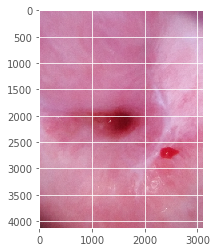

In [18]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[0])

../data/processed/grayscale_resize/train/237.jpg
(100, 100)


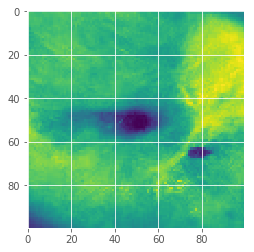

In [20]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).grayscale_resize_path.iloc[0])

../data/train/Type_1/57.jpg
(4128, 3096, 3)


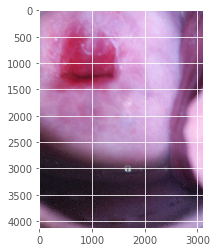

In [21]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[1])

../data/processed/grayscale_resize/train/57.jpg
(100, 100)


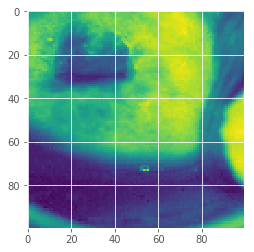

In [22]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).grayscale_resize_path.iloc[1])

../data/train/Type_1/1422.jpg


/Users/dbcerigo/dev/cervix/venv/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 484245504 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/Users/dbcerigo/dev/cervix/venv/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 10531. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))


(4128, 3096, 3)


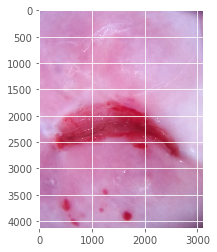

In [23]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[3])

../data/processed/grayscale_resize/train/1422.jpg
(100, 100)


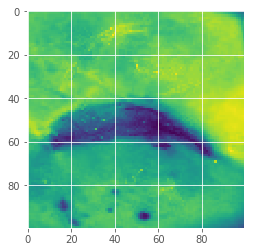

In [24]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).grayscale_resize_path.iloc[3])